# Phase space reconstruction

### Ana Daniela del Río Pulido and Erin C. McKiernan

### Facultad de Ciencias, UNAM

In this practical, students will get to know a little about dynamical systems. In particular they will learn how to use Taken's theorem, also called time delay method, for reconstructing an attractor based on a time series. In the next notebook they will get to apply what they learnt here in an electrocardiogram time series.

# Setting up the notebook

We begin by setting up the Jupyter notebook and importing the Python modules needed for plotting figures, create animations, etc. We include commands to view plots in the Jupyter notebook, and to create figures with good resolution and large labels. These commands can be customized to produce figures with other specifications.

In [1]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

# Time series

A **time series** is a sequence of measurements of an observable or scalar quantity that changes in time and which depends on the current state of the system. We
can think about this time series ($s_n$) as a function of the state ($x$) which depends on the n-th measurement at a certain time interval ($∆t$) [Kantz and Schreiber, 2004, pg. 35].

\begin{equation}
    s_n = s(x(n∆t)) + η_n
\end{equation}
    
Where:

• $s_n$ : observable or scalar quantity

• $η_n$ : noise or random fluctuations

# What do time series and electrocardiogram have in common?

Well, the ecg is precisely a time series of the heart's electric signals! It is very important to study the heart because the leading cause of death globall are cardiovascular diseases. 3 out of 10 deaths are because of heart disease [WHO, 2019]. 
If simpler techniques for studying the heart are developed, more people could be saved from heart failure. With this in mind, we will start uncovering the intricacies of the heart's dynamics.

# A little bit of theory about dynamical systems

Dynamics is the subject that deals with change, *i.e.* with systems that evolve in time. A system could do anything, like: settling to equilibrium, keep repeating cycles or do other complicated patterns [Strogatz, 1994, pg. 2]. For example, a system could be anything as complicated as the human being, a bacteria, global market or even a pendullum (we will come back to this last example later).


[<img src="Images\pendullum.png" width="200" height ="100"/>](Images\pendullum.png)
Image taken from: https://i.imgur.com/b2eX4w6.png (Consulted on March 21, 2020)

The **phase space** is a space in which all possible states of a system are represented. *I.e.* each point in phase space represents a possible state of the system. One can think of phase space as completely filled with trajectories. Imagine that every possible state of the system is an initial condition [Strogatz, 1994, pg. 7]. Depending on the system's dynamics is how the system will evolve in time. For example, thing of a pendullum with no friction. A possible state of the system is not moving at all (represented by a point in the following image). Another state of the system is oscillating in a small angle (small oscillations). Another one is completing full turns (represented by the red line). It is important to understand the concept of phase space because the rest of the notebook is based on this concept. If it is not clear, make a quick Google search about this concept.

<img src="Images\phase_space_pendullum.png" width ="400" height ="150" > 
Image taken from: https://www.researchgate.net/profile/Rowena_Ball/publication/2148876/figure/fig5/AS:668675875041284@1536436160306/The-phase-space-of-the-simple-pendulum.png (Consulted on March 23, 2020)


The phase space does not necessarily have to be a plane or three-dimensional. Its dimension is the number of variables needed to characterize the state of the system [Strogatz, 1994, pg. 9].

Sometimes, a system is on a state that if it remains unperturbed, it will stay forever in this state. This is called a fixed point and there are two kinds: attractos and repellers. An **attractor** is a point in the state space where given an initial condition, the system will eventually get to the fixed point. In the pendullum example, the attractor is when it is hanging in a 90 degree angle with respect to the floor. Imagine the pendullum started at a different angle and was not perturbed by any outside factor, then it would oscillate forever in that cycle.


The attractor of a system does not necesarrily have to be a single point or cycle. Sometimes it takes different and beautiful forms. Have you ever seen the movie: **The butterfly effect**? It is based on the following image. It is the attractor of a system called the Lorenz system. As you can see, it looks nothing like a point. Observe how the attractor of a system can take any shape.
<img src="Images\Lorentz_attractor.png" width ="200" height ="100" > 
Image taken from: https://upload.wikimedia.org/wikipedia/commons/7/71/Lorenz_system_r28_s10_b2-6666.png (Consulted on March 21, 2020)

In general, the attractor of a system is N-dimensional. This can lead to visualization problems because of human's perceptual limitations. Througout the notebook, we are going to be restricted to 2 or 3 dimensional slices of the phase space, that is were the attractors are. 

## Phase space reconstruction

How can you reconstruct the phase space of a system if you only have a time series of one of the system's variables?

Very simple! Other people have thought about that and we can use what they have discovered. There is a very famous article in Dynamical Systems called Embedology from Sauer et al. in 1991. They assure that given the time series of only one observed quantity, it is possible to reconstruct the attractor (which lies in phase space) [Sauer et al., 1991,
pp. 580]. 

There are various methods for reconstructing the attractor, a now famous one is the principal-component analysis [Broomhead and King, 1986] [Savi, 2005, pg.
635]. Nevertheless, we will focus on the **method of delay**, also called Taken's theorem [Takens, 1981]. The theorem is the following:

Let $A$ be an attractor that lies in an N-dimensional compact manifold $M \subset \mathbb{R}^n$. Define a reconstruction function $F:M\rightarrow \mathbb{R}^{2N+1}$ as
  \begin{equation}
      F(x) := [\phi_0^{(j)}(x) \phi_\tau^{(j)}(x) ... \phi_{2N\tau}^{(j)}(x)]^T
  \end{equation}
  Where $\phi_t^{(j)}(x)$ is the $j$th component of $\phi_t(x)$, $j$ is arbitrary and $\tau > 0$ is the sampling period chosen arbitrarily.
  
  (Notice that $\phi_t(x)$ is an observable or scalar quantity. This is precisely our time series. $\phi_t^{(j)}(x)$ represents the $j$th component of this time series.)
  
  F is an embedding, *i.e.* F diffeomorphically maps M onto some compact N-dimensional manifold $M' \subset \mathbb{R}^{2N+1}$. (This is the beauty of this theorem, that this function F exists between the observable and the attractor.)
  
  So, given a sequence $\{y_k\} := \{\phi_{k\tau}^{(j)}\}_{k=1}^\kappa$ that corresponds to a uniformly time-sampled component of a trajectory that lies on an attractor A, the sequence of points

\begin{align*} 
     [y_0 y_1 ... y_{2N}]^T
    \\
     [y_1 y_2 ... y_{2N+1}]^T
     \\
     \vdots
     \\
     [y_i y_{i+1} ... y_{i+2N}]^T
     \\
     \vdots
     \\
     [y_{K-2N} y_{K-2N+1} ... y_{K}]^T
\end{align*}

  lies on a diffeomorphic copy of A [Parker and Chua, 2012, pp. 191].
  
  ($\{y_k\}$ is the reconstructed attractor we are looking for.) 
  
  In essence, this theorem states that a function exists between an observable of a system and its attractor.
  
  ### Time lag
  
  The **time lag** ($\tau$) is the difference between two data samples and it is called lag or delay time. It has no relevance in the mathematical framework, so there is no formal way of obtaining its optimal value. Nevertheless, $\tau$ is relevant in practice [Sauer, 2006] [Parker and Chua, 2012, pp. 195].
  
  • If $\tau$ is small compared to the system's internal time scales, then successive elements of the delay vectors are strongly correlated. The attractor is clustered around the diagonal of the reconstruction space.

  • If $\tau$ is large, successive elements are almost independent or uncorrelated. The attractor's structure disappears or is very complicated.

  • If $\tau$ is close to a periodicity of the system, the component with that period will be underrepresented.

Taken's theorem has been used widely in physiology. In the following work it will be used for data series of a human electrocardiogram. However, there are other studies in which it has been used to reconstruct the attractor of the arterial blood pressure, for example see: [Charlton et al., 2015] [Aston et al., 2018].

Notice the following observation, the attractor lies in phase space. So if we are reconstructing the attractor, we can say that in general, we are reconstructing a part of phase space. We will refer to the reconstruction of phase space in the rest of the notebook. This will be relevant because when reconstructing the heart's phase space, we cannot say that this is the attractor. In some cases, this phase space does not have a defined shape, it simply looks like a mass of uncorrelated points. And this cannot be the attractor.

# Getting down to business

## Reconstruction of two artificial time series

We will create two artificial time series, $a$ and $b$:

The first contains uniformly distributed random numbers in the interval $[0, 1]$:

\begin{equation}
    \{a_n , n = 1, . . . , 4096\}
\end{equation}
    
The second series is based on the deterministic evolution of $x_n$ which follows the rules $x_0 = 0.1$ and $x_{n+1} = 1 − 2x^2_n$. The values $x_n$ are not measured directly but through the nonlinear observation function $b_n = \arccos(−x_n)/π$.

\begin{equation}
    \{b_n , n = 1, . . . , 4096\}
\end{equation}

First time series $a$

In [2]:
n = 4096
a = np.zeros(n) #Generates a vector of 4096 entries full of zeros
print(np.size(a)) # Displays the size of this vector

for i in range(0,n): 
    a[i] = rd.uniform(0, 1) #Asigns a random value between [0, 1] to the n-value of x
print(a) # The first of the two time series

4096
[0.8566177  0.27978588 0.97029683 ... 0.4049685  0.42112666 0.36767377]


We need to check that a's elements are in the interval $[0, 1]$.

In [3]:
print("The maximum value of a is: "+str(max(a)))
print("The minimum value of a is:",min(a))

The maximum value of a is: 0.9999995665185737
The minimum value of a is: 0.0005135347004759927


Second time series $b$

${b_n , n = 1, . . . , 4096}$ is based on the deterministic evolution of $x_n$ which follows the rules x$_0 = 0.1$ and $x_{n+1} = 1 − 2x^2_n$.

In [4]:
def x_next(x): #Generating a function for returning the next value of x_n
    return 1-2*x**2

In [5]:
x0 = 0.1
xn = np.zeros(n) #Initiating the xn with zero values
xn[0] = x0

for i in range(1,n): 
    xn[i] = x_next(xn[i-1]) # The series xn

The values $x_n$ is measured through the nonlinear observation function $b_n = \arccos(−x_n)/π$.

In [6]:
b = np.arccos(-xn)/np.pi #Second time series

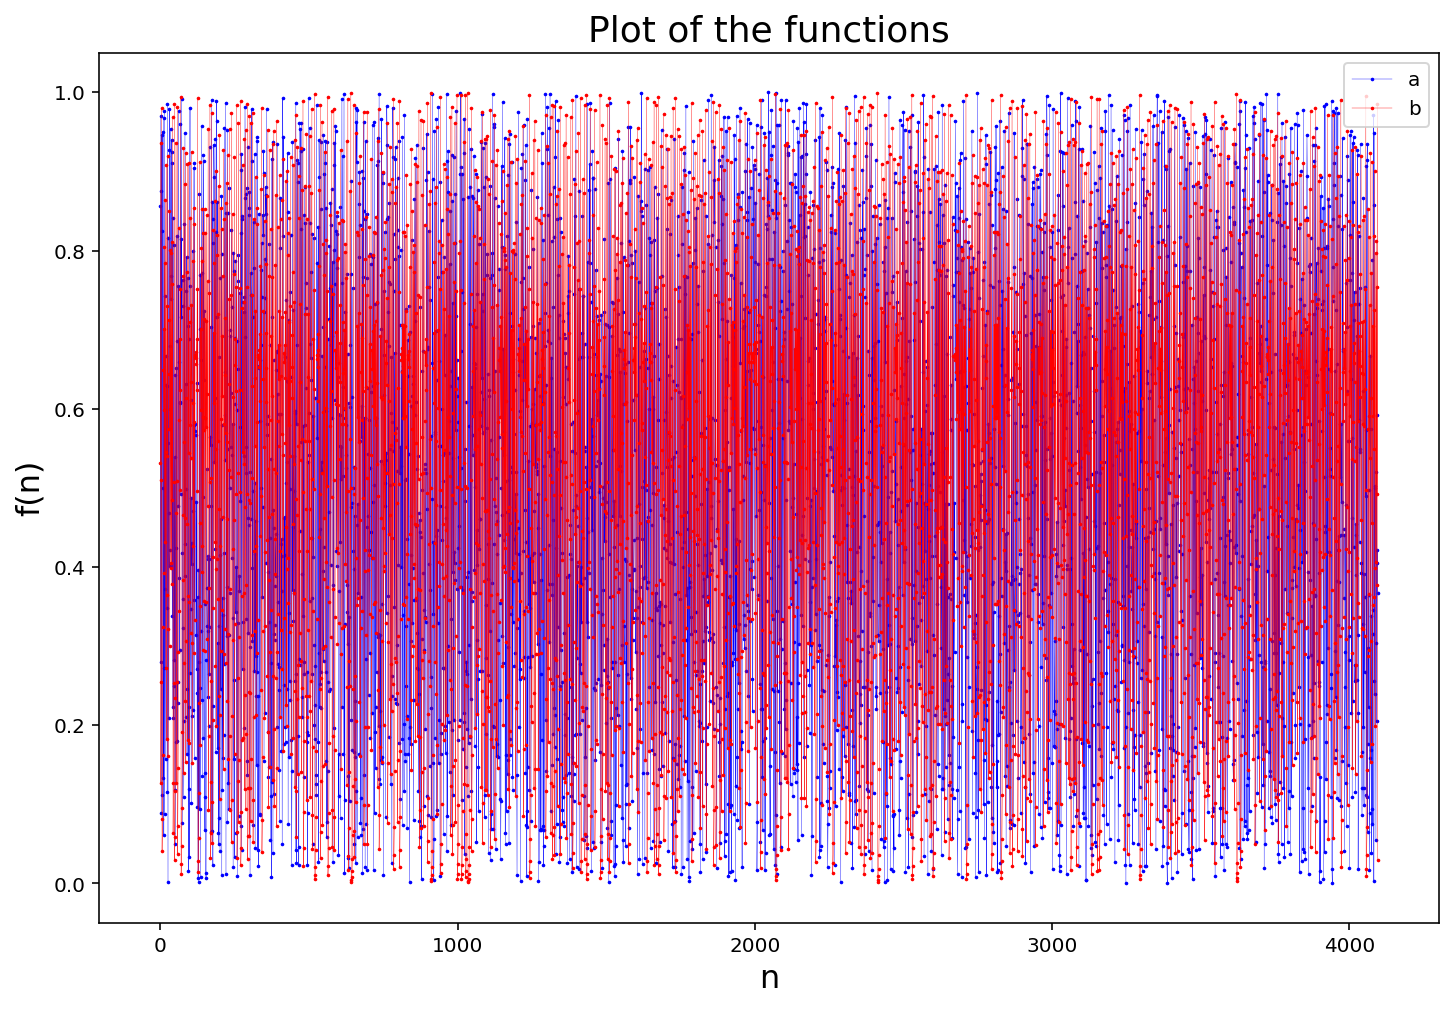

In [7]:
plt.figure(figsize=(12,8))
ns = [i for i in range(0, n)] #Sequence from 0 to 4096

plt.plot(ns, a, marker = 'o', color = 'blue', label = "a",  markersize = 0.8, linewidth = 0.2)
plt.plot(ns, b, marker = 'o', color = 'red', label = "b",  markersize = 0.8, linewidth = 0.2)
plt.title("Plot of the functions")
plt.xlabel("n")
plt.ylabel("f(n)")
plt.legend()
plt.show()

As we cannot really see a difference between the two functions, why not plotting a histogram? In this way, we can the distribution of both functions in the interval [0, 1].

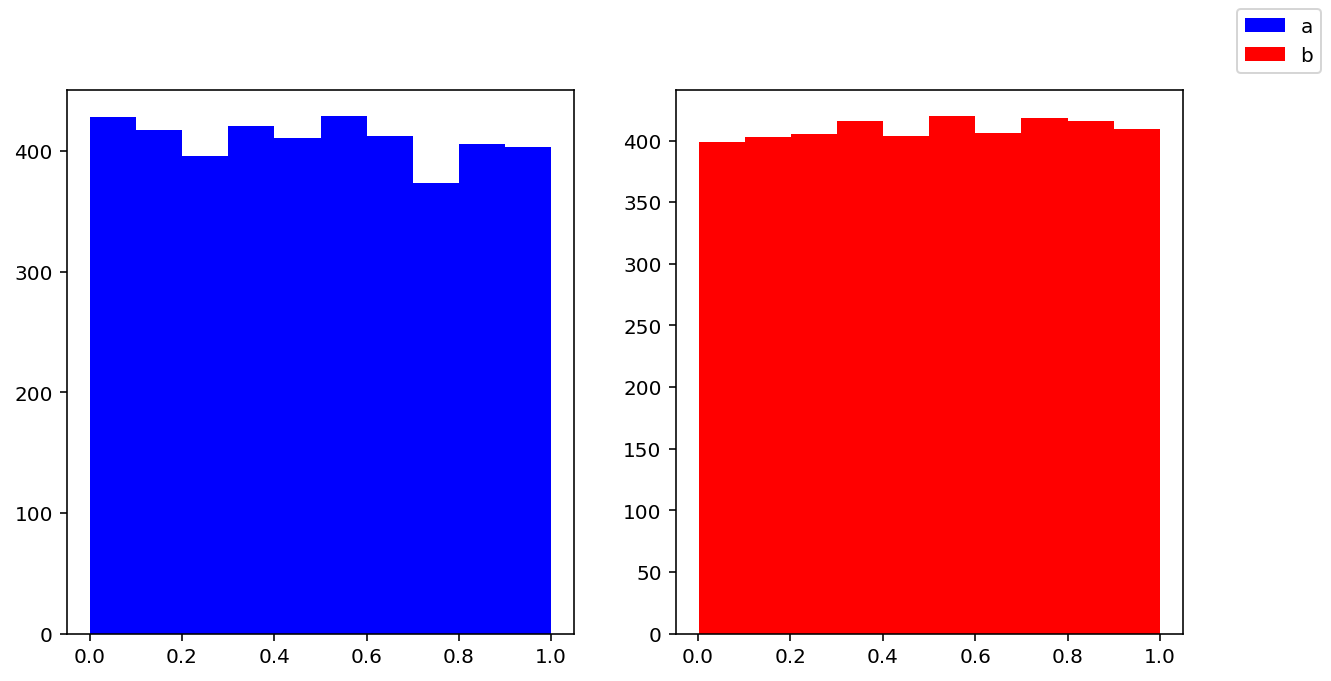

In [8]:
f, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].hist(a, color = 'blue', label = "a")
axs[1].hist(b, color = 'red', label = "b")

f.legend()
plt.show()

Notice that the distribution of both graphs are basically a uniform distribution in the interval [0,1].

When you are suspicious that two functions are the same, what do you measure? If you ask a statistician (or if you see many biology or medicine papers), you would see that people like to measure **mean** and **variance** of the previous sequences. What do you think will happen with these measures?

Let us find out!

In [9]:
#Function that obtains the mean of a time series in a specific time interval
def vec_means(xs, h = 50):
    length_xs = np.size(xs)-1 #Length of vector minus 1
    length = int(np.floor(length_xs/h)) #Number of iterations of the cycle
    means, ns = np.zeros(length), np.zeros(length) #Initializes the vectors
    for i in range(0, length): #Cycle for adding elements to the vectors
        means[i] = np.mean(xs[i:i+h]) #Calling the mean function created above for that particular time bin
        ns[i] = i*h
    return means, ns #Returns the vector of means and the time

# Function that obtains the variances in different time windows
def vec_variance(xs, h = 10):
    length_xs = np.size(xs)-1
    length = int(np.floor(length_xs/h))
    variance, ns = np.zeros(length), np.zeros(length) 
    for i in range(0, length):
        variance[i] = np.var(xs[i:i+h])
        ns[i] = i*h
    return variance, ns

In [10]:
nn = 25 #For a time window of nn

#Means for both time series
ymean_a, xmean_a = vec_means(a, nn)
ymean_b, xmean_b = vec_means(b, nn)

#Variances for both time series
yvar_a, xvar_a = vec_variance(a, nn)
yvar_b, xvar_b = vec_variance(b, nn)

Instead of generating different plots like above, we will use subplots.

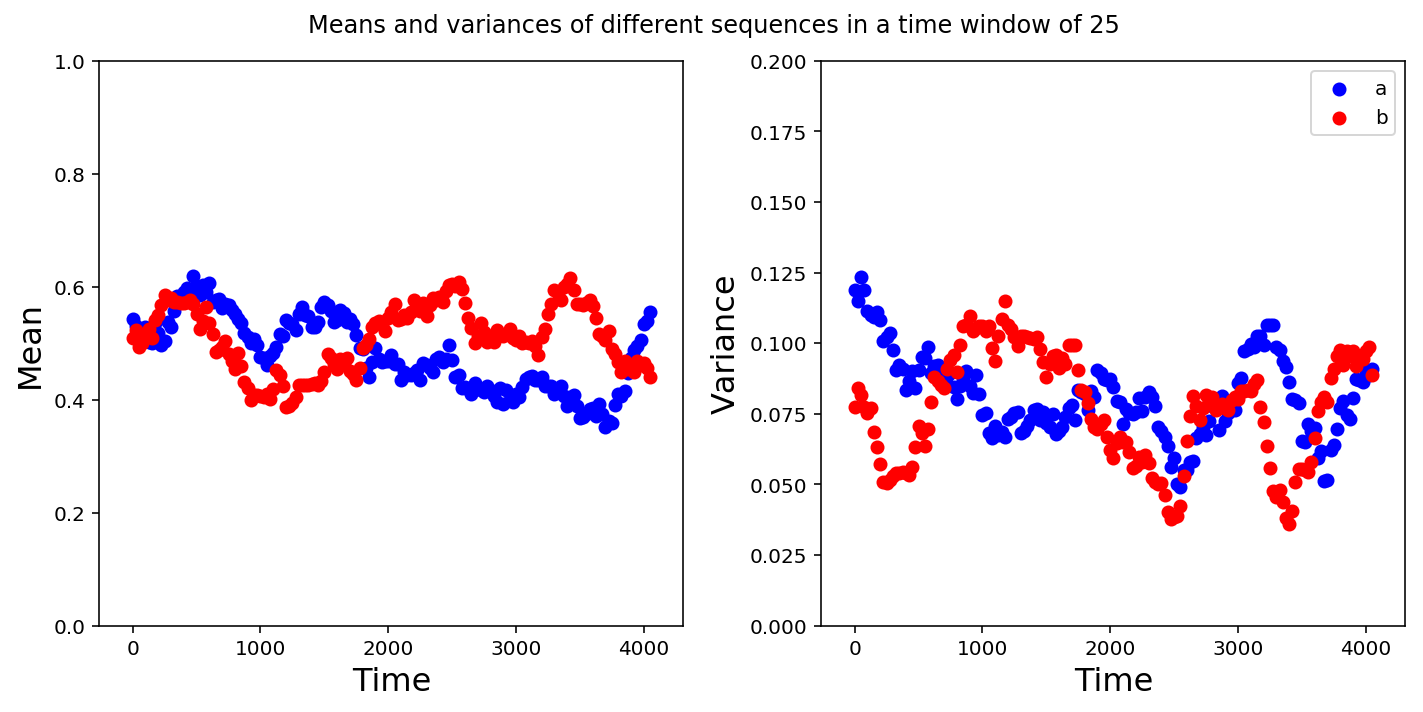

In [11]:
fig, axs = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('Means and variances of different sequences in a time window of '+str(nn)) 

axs[0].scatter(xmean_a, ymean_a, label = "a", marker = "o", color = "blue")
axs[0].scatter(xmean_b, ymean_b, label = "b", marker = "o", color = "red")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Mean")
axs[0].set_ylim([0, 1])
axs[0].set_title(" ")


axs[1].scatter(xvar_a, yvar_a, label = "a", marker = "o", color = "blue")
axs[1].scatter(xvar_b, yvar_b, label = "b", marker = "o", color = "red")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Variance")
axs[1].set_ylim([0, 0.2])

plt.tight_layout()
plt.legend()
plt.show()

Notice that both the means and variances look very similar in both sequences.

### Reconstruction of the function using the values $x_n$ and $x_{n+1}$

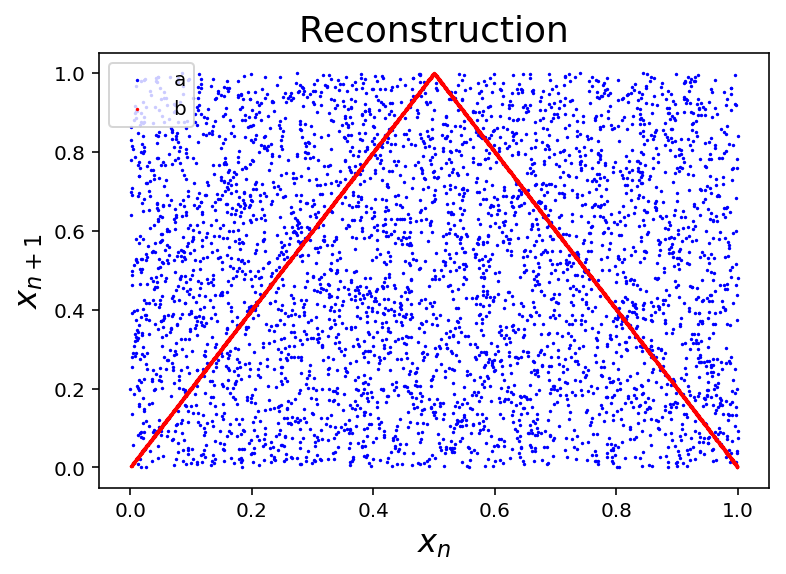

In [12]:
plt. scatter(a[0: n-1], a[1: n], color = "blue", label = "a", s = 0.5)
plt.scatter(b[0: n-1], b[1: n], color = "red", label = "b", s = 0.5)
plt.xlabel(r"$x_n$")
plt.ylabel(r"$x_{n+1}$")
plt.title("Reconstruction")
plt.legend()
plt.show()

Notice how in the first time series ($a$), we only plotted uniformly distributed random numbers. So there is no relationship between one value and the next one. No pattern emerges in the reconstructed phase space.

Neverthless, in the second time series, a pattern arises for the $b$ series. Notice that the deterministic evolution of $x_n$ where $x_0 = 0.1x_{n+1} = 1−2x^2_n$, measured through the nonlinear observation function $b = arccos(−x_n)/π$ gave way to a pattern. This pattern is known as the attractor which is reconstructed in phase space.

In this plot, the time delay we are considering is 1, in other words, $τ = 1$. Nevertheless, we could use another time delay, and the same (or would it be different?) pattern would emerge. Try it out!

## Exercise: Reconstruct the previous time series using a time delay of your election. For example, try a $τ = 9$ and see what happens!

# Henon map

A famous system of coupled equations is the Henon map. For more information, see: https://mathworld.wolfram.com/HenonMap.html
$$x_{n+1} = 1-ax_n^2 + y_n$$
$$y_{n+1} = bx_n$$

Where $a$ and $b$ are constants with values: $a= 1.4$ and $b = 0.3$.

Notice that given an initial value, we insert this in the system of equations and we obtain the next values. Then these values are inserted in the equations and we obtain the next ones. This process is repeated until we stop iterating.

In [13]:
# Defining the Henon function with the given values
#Notice that we are predefining the values of a and b
def henon(x, y, a=1.4, b=0.3):
    return [1-a*x**2+y, b*x]

In [14]:
x0 , y0 = 0.5, 0.5 #Starting in any point, the function will converge to the Henon map
n = 1000 #Number of iterations

#Initializing two vectors of zeros
xx = np.zeros(n)
yy = np.zeros(n)
xx[0], yy[0] = x0, y0 #The first two values of the sequence will be the startint point

for i in range(1, n): #Cycle for generating the henon map
    xx[i], yy[i] = henon(xx[i-1], yy[i-1])

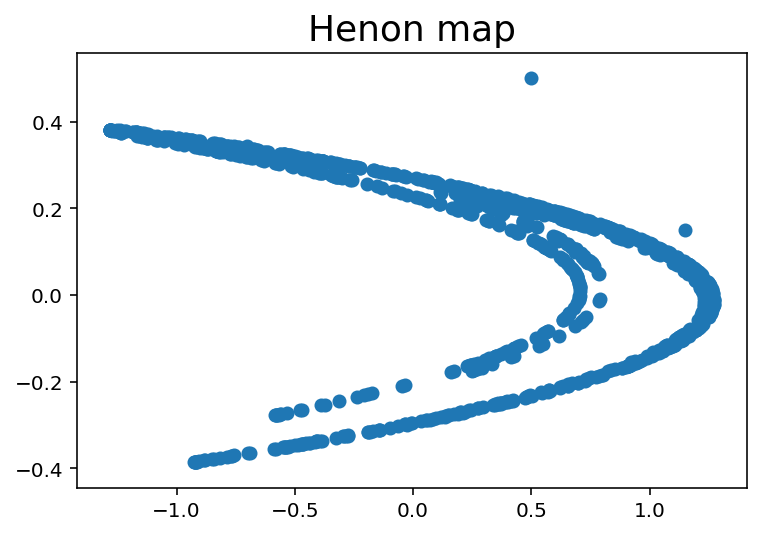

In [15]:
plt.scatter(xx, yy)
plt.title("Henon map")
plt.show()

Now, we reconstruct the attractor for the Henon map.

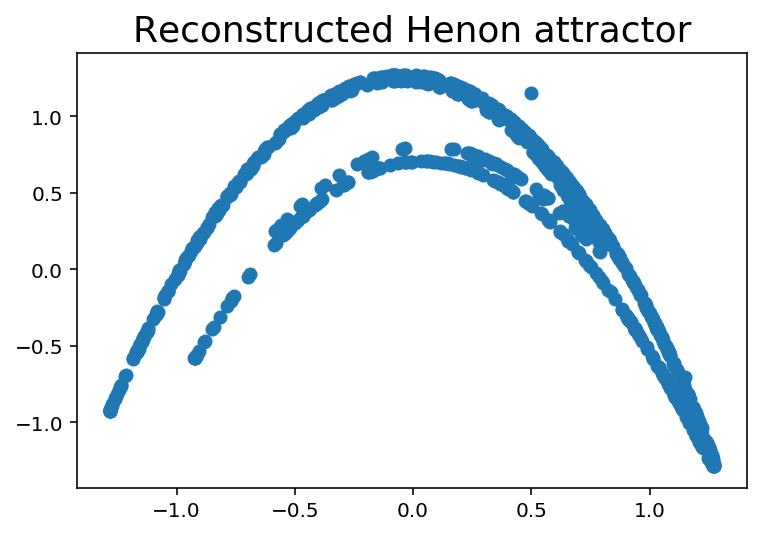

In [16]:
plt.scatter(xx[0:n-1], xx[1: n])
plt.title("Reconstructed Henon attractor")
plt.show()

# Exercise: Choose your favorite mathematic function and graph it. Afterwards, reconstruct its phase space using this time delay technique plotting the values $x_n$ and $x_{n+1}$

A suggestion is using the method given in the Henon map. Choose an initial value $x_0$ and insert it in your favorite mathematical function for obtaining the next value. Then insert this value in the function and repeat this process until you create a sequence of elements. Now, graph it and reconstruct the phase space.

Now that we are finally familiarized with reconstructing phase space, we will focus on reconstructing the heart's phase space in the next notebook.

# References

[Aston et al., 2018] Aston, P. J., Christie, M. I., Huang, Y. H., and Nandi, M. (2018). Beyond hrv: attractor reconstruction using the entire cardiovascular waveform data for novel feature extraction. Physiological measurement, 39(2):024001.

[BackyardBrains, 2017] BackyardBrains (2009-2017). Experiment: Heart Action Potentials. https://backyardbrains.com/experiments/heartrate. Accessed December 20, 2019.

[Boron and Boulpaep, 2012] Boron, W. F. and Boulpaep, E. L. (2012). Medical physiology, 2e updated edition e-book: with student consult online access. Elsevier health sciences.

[Charlton et al., 2015] Charlton, P. H., Camporota, L., Smith, J., Nandi, M., Christie, M., Aston, P. J., and Beale, R. (2015). Measurement of cardiovascular state using attractor reconstruction analysis. In 2015 23rd European Signal Processing Conference (EUSIPCO), pages 444–448. IEEE.

[Gray et al., 1998] Gray, R. A., Pertsov, A. M., and Jalife, J. (1998). Spatial and temporal organization during cardiac fibrillation. Nature, 392(6671):75.

\*[Kantz and Schreiber, 2004] Kantz, H. and Schreiber, T. (2004). Nonlinear time series analysis, volume 7. Cambridge university press.

[Parker and Chua, 2012] Parker, T. S. and Chua, L. (2012). Practical numerical algorithms for chaotic systems. Springer Science & Business Media.

\*[Sauer et al., 1991] Sauer, T., Yorke, J. A., and Casdagli, M. (1991). Embedology. Journal of statistical Physics, 65(3-4):579–616.

[Sauer, 2006] Sauer, T. D. (2006). Attractor reconstruction. Scholarpedia, 1(10):1727. revision #91017.

[Savi, 2005] Savi, M. (2005). Chaos and order in biomedical rhythms. Journal of the Brazilian Society of Mechanical Sciences and Engineering, 27(2):157–169.

\*[Srinivasan et al., 2003] Srinivasan, N., Wong, M., and Krishnan, S. (2003). A new phase space analysis algorithm for cardiac arrhythmia detection. In Proceedings of the 25th Annual International Conference of the IEEE Engineering in Medicine and Biology Society (IEEE Cat. No. 03CH37439), volume 1, pages 82–85. IEEE.

[Strogatz, 1994] Strogatz, S. H. (1994). Nonlinear dynamics and chaos: with applications to physics, biology, chemistry, and engineering.

[Szulewski, 2018] Szulewski, A. (2018). Normal ECG. https://elentra.healthsci.queensu.ca/assets/ modules/ECG/normal_ecg.html.

[Umapathy et al., 2010] Umapathy, K., Nair, K., Masse, S., Krishnan, S., Rogers, J., Nash, M. P., and Nanthakumar, K. (2010). Phase mapping of cardiac fibrillation. Circulation: Arrhythmia and Electrophysiology, 3(1):105–114.

[WHO, 2019] WHO (2019). Cardiovascular Diseases. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds). Accessed December 21, 2019.

\* Denotes the most useful resources for the creation of this notebook.